# **Loan Eligibility Prediction System**
This project is a machine learning–based web application that predicts whether a loan application will be approved or rejected based on applicant details such as income, credit history, education, employment status, and property area.
The model is trained using a Random Forest classifier with proper data preprocessing and is deployed using Streamlit to allow real-time user input and prediction.

 **Problem Statement**
 
Financial institutions need a reliable system to determine whether a loan applicant is eligible for approval. Manual evaluation is time-consuming and error-prone. This project aims to automate loan eligibility prediction using machine learning techniques.

**Objectives**
* To analyze applicant data and identify key factors affecting loan approval
* To build a machine learning model for predicting loan eligibility
* To provide loan approval results with probability percentage
* To deploy the model using Streamlit for real-time user input


**Dataset Description**
The dataset used in this project is a loan application dataset obtained from Kaggle. It contains applicant demographic details, income information, credit history, and loan-related attributes.

**Features:**
* Applicant Income
* Coapplicant Income
* Loan Amount
* Loan Amount Term
* Credit History
* Gender, Marital Status, Education
* Property Area


**1. IMPORT REQUIRED LIBRARIES**

In [1]:
#data handling
import numpy as np
import pandas as pd

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#data precprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)


#to save model
import joblib


#style for plot
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")



**2. LOADING DATASET**

In [2]:
#load data
df=pd.read_csv('/kaggle/input/loan-eligibility-prediction/Loan Eligibility Prediction.csv')
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


**3. EXPLORATORY DATA ANALYSIS**

In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [4]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.shape


(614, 13)

In [6]:
#checking for null values
df.isnull().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

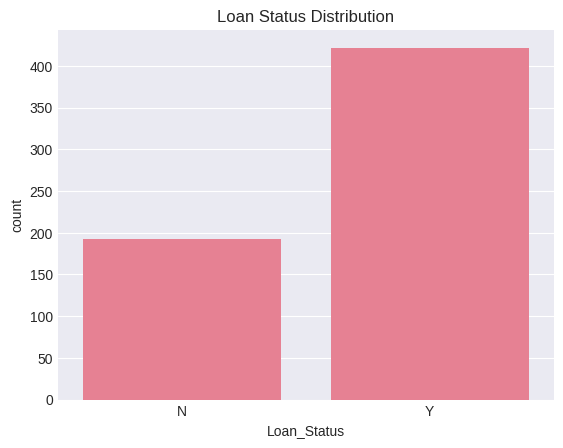

In [7]:
#visualizing 
sns.countplot(x='Loan_Status',data=df)
plt.title("Loan Status Distribution")

plt.show()

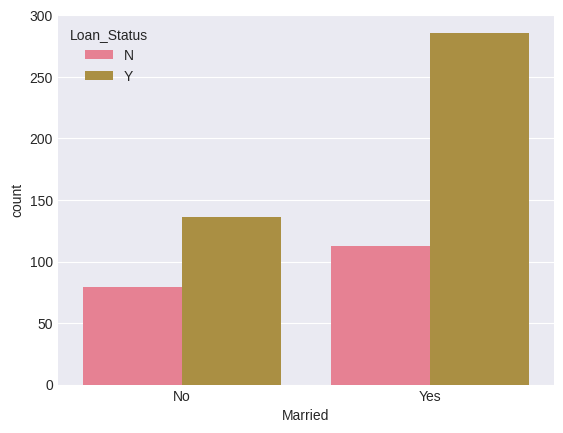

In [8]:
#MARRIED VS LOAN _STATUS
sns.countplot(x='Married',hue='Loan_Status',data=df)
plt.show()

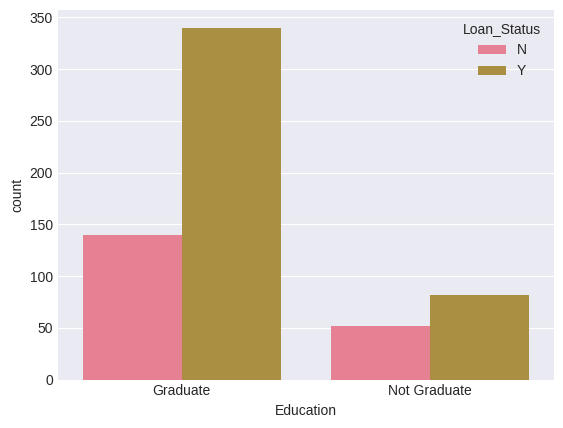

In [9]:
#education vs loan_status
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.show()

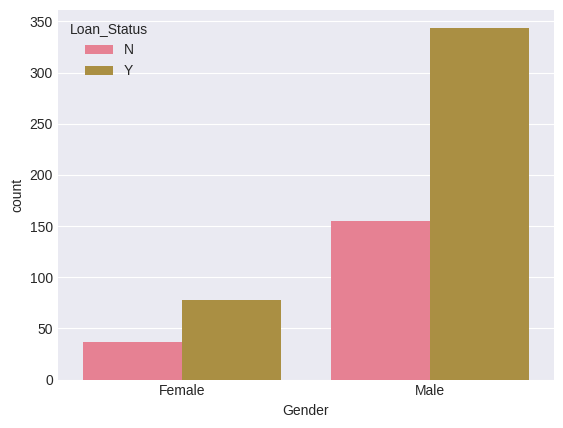

In [10]:
#gender vs loan_status

sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.show()

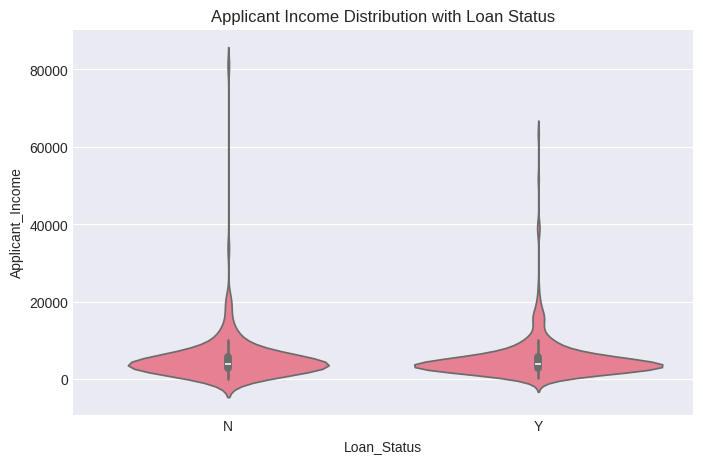

In [11]:
#Applicant_income with loan_status
plt.figure(figsize=(8,5))
sns.violinplot(x='Loan_Status', y='Applicant_Income', data=df)
plt.title("Applicant Income Distribution with Loan Status")
plt.show()


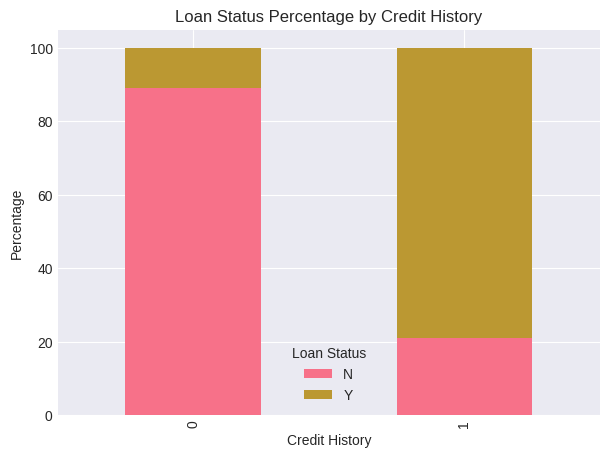

In [12]:
#relationship of credit history with loan status
credit_loan = pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100
credit_loan.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Loan Status Percentage by Credit History")
plt.ylabel("Percentage")
plt.xlabel("Credit History")
plt.legend(title="Loan Status")
plt.show()


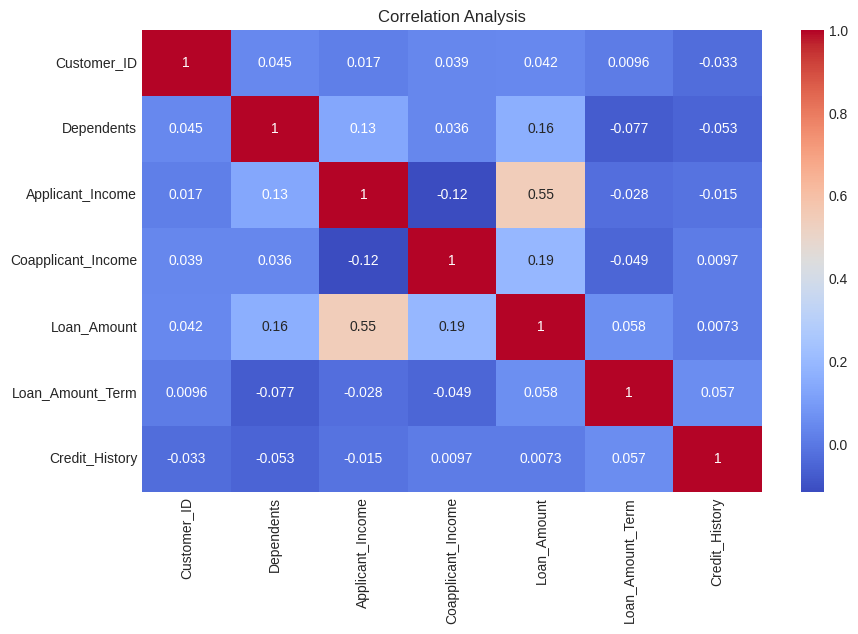

In [13]:
#CORRELATION MATRIX
#feature feature analysis of numerical data only
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Analysis")
plt.show()


**4.Feature Engineering**
Feature engineering is the process of creating, transforming, or modifying features to improve model performance and prediction accuracy.

**Feature selection**:
From EDA, we learned that credit_history strongly affects loan_status and Applicant_Income and Loan amount also have some Effect.Customer_Id is useless for prediction so it should be dropped.

In [14]:
#drop customer_id as it is not necessary for model training
df.drop('Customer_ID',axis=1,inplace=True)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [15]:
#adding feature
#TOTAL INCOME
df['Total_Income']=df['Applicant_Income']+df['Coapplicant_Income']


#EMI
df['EMI']=df['Total_Income']/df['Loan_Amount_Term']

#income to loan ratio
df['Income_Loan_Ratio'] = df['Total_Income'] / df['Loan_Amount']
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Income_Loan_Ratio
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N,2378.0,6.605556,264.222222
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y,2385.0,19.875000,140.294118
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y,3620.0,30.166667,144.800000
3,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y,3459.0,28.825000,138.360000
4,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y,6500.0,18.055556,250.000000


**5.Handle Categorical Variables (Encoding)**

In [16]:
#Convert target variable
df['Loan_Status'] = df['Loan_Status'].astype(str).str.strip()
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

df.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Income_Loan_Ratio
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,0,2378.0,6.605556,264.222222
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,1,2385.0,19.875000,140.294118
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,1,3620.0,30.166667,144.800000
3,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,1,3459.0,28.825000,138.360000
4,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,1,6500.0,18.055556,250.000000


In [17]:
#Encoded categorial features
le=LabelEncoder()
cat_features=   [ 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in cat_features:
    df[col]=le.fit_transform(df[col])


In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Income_Loan_Ratio
0,0,0,0,0,0,2378,0.0,9,360,1,2,0,2378.0,6.605556,264.222222
1,1,1,2,0,0,1299,1086.0,17,120,1,2,1,2385.0,19.875000,140.294118
2,1,0,0,1,0,3620,0.0,25,120,1,1,1,3620.0,30.166667,144.800000
3,1,1,0,0,1,3459,0.0,25,120,1,1,1,3459.0,28.825000,138.360000
4,1,1,1,0,0,5468,1032.0,26,360,1,1,1,6500.0,18.055556,250.000000


In [19]:
#convert loan_amount_term(months) into years
df['Loan_Term_Years'] = df['Loan_Amount_Term'] / 12
df.drop('Loan_Amount_Term', axis=1, inplace=True)


In [20]:
print(df.columns)#checking the column name
df.head()


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Credit_History', 'Property_Area', 'Loan_Status', 'Total_Income', 'EMI',
       'Income_Loan_Ratio', 'Loan_Term_Years'],
      dtype='object')


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Income_Loan_Ratio,Loan_Term_Years
0,0,0,0,0,0,2378,0.0,9,1,2,0,2378.0,6.605556,264.222222,30.0
1,1,1,2,0,0,1299,1086.0,17,1,2,1,2385.0,19.875000,140.294118,10.0
2,1,0,0,1,0,3620,0.0,25,1,1,1,3620.0,30.166667,144.800000,10.0
3,1,1,0,0,1,3459,0.0,25,1,1,1,3459.0,28.825000,138.360000,10.0
4,1,1,1,0,0,5468,1032.0,26,1,1,1,6500.0,18.055556,250.000000,30.0


**5.Split Features and Target**

In [21]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Income_Loan_Ratio,Loan_Term_Years
0,0,0,0,0,0,2378,0.0,9,1,2,0,2378.0,6.605556,264.222222,30.0
1,1,1,2,0,0,1299,1086.0,17,1,2,1,2385.0,19.875000,140.294118,10.0
2,1,0,0,1,0,3620,0.0,25,1,1,1,3620.0,30.166667,144.800000,10.0
3,1,1,0,0,1,3459,0.0,25,1,1,1,3459.0,28.825000,138.360000,10.0
4,1,1,1,0,0,5468,1032.0,26,1,1,1,6500.0,18.055556,250.000000,30.0


In [22]:
print(y.head())


0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64


**6.Train_Test_Split**

In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**7.TrainRandomClassifier**

In [24]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_split=8,
    class_weight='balanced',
    random_state=42
)


rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=8, n_estimators=400, random_state=42)

**8.Model Evaluation**

In [25]:

y_pred = rf.predict(X_test)


#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2), "%")


#Precision
precision = precision_score(y_test, y_pred)
print("Precision:", round(precision,2))


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1,2))


#Recall
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall,2))


Accuracy: 80.49 %
Precision: 0.81
Confusion Matrix:
 [[22 18]
 [ 6 77]]
F1 Score: 0.87
Recall: 0.93


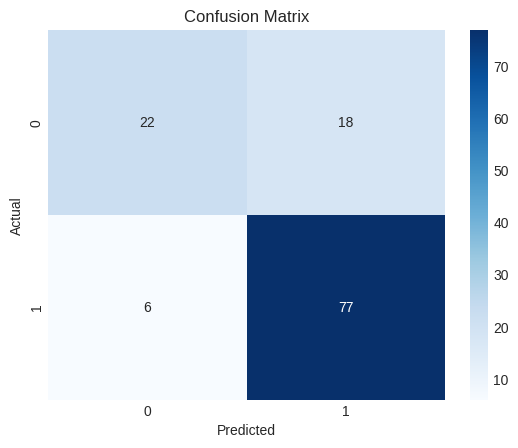

In [26]:
#plotting confusion matrix for visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
#Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.55      0.65        40
           1       0.81      0.93      0.87        83

    accuracy                           0.80       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.80      0.80      0.79       123



**9.Add probability to DataFrame for analysis**

In [28]:
X_test_copy = X_test.copy()
X_test_copy['Actual_Loan_Status'] = y_test
X_test_copy['Approval_Probability_%'] = (rf.predict_proba(X_test)[:,1] * 100).round(2)

X_test_copy.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area,Total_Income,EMI,Income_Loan_Ratio,Loan_Term_Years,Actual_Loan_Status,Approval_Probability_%
350,1,0,2,0,0,4354,0.0,136,1,0,4354.0,12.094444,32.014706,30.0,1,67.63
377,1,1,2,1,0,3357,2859.0,144,1,2,6216.0,17.266667,43.166667,30.0,1,76.89
163,1,1,1,0,0,2491,2054.0,104,1,1,4545.0,12.625000,43.701923,30.0,1,92.52
609,1,1,2,0,0,2947,1603.0,10,1,2,4550.0,12.638889,455.000000,30.0,0,75.90
132,1,0,0,0,0,2935,0.0,98,1,1,2935.0,8.152778,29.948980,30.0,1,83.56


**10.Save the trained model**

In [29]:
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']